In [52]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [53]:
#Read the data
cars=pd.read_csv(r"C:\Users\girim\Downloads\Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [54]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [55]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [56]:
cars.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

In [57]:
cars.duplicated().sum()

0

In [58]:
cars.any()

HP     True
MPG    True
VOL    True
SP     True
WT     True
dtype: bool

In [59]:
#check for missing values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

**EDA**

In [61]:
import warnings
warnings.filterwarnings('ignore')

<Axes: >

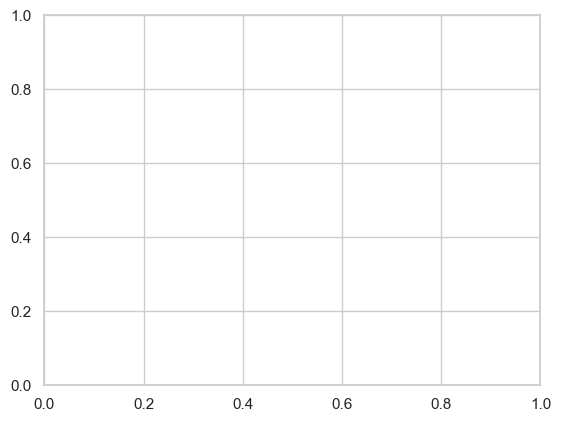

In [62]:
sns.set(style='whitegrid')
sns.boxplot(cars='HP',kde=True,bins=20,color='blue')


<Axes: xlabel='WT', ylabel='MPG'>

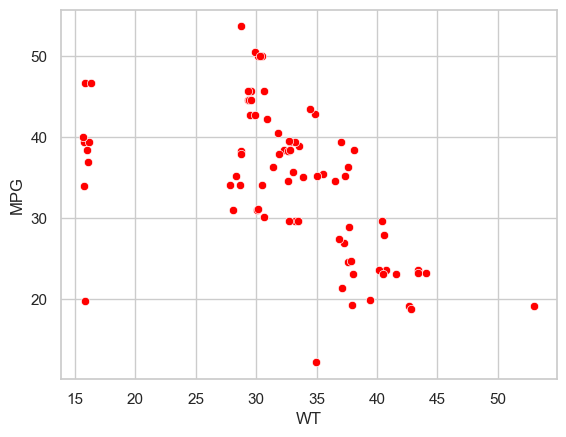

In [63]:
from seaborn import scatterplot
scatterplot(x=cars['WT'],y=cars['MPG'],color='red')

**Correlation Matrix**

In [65]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: >

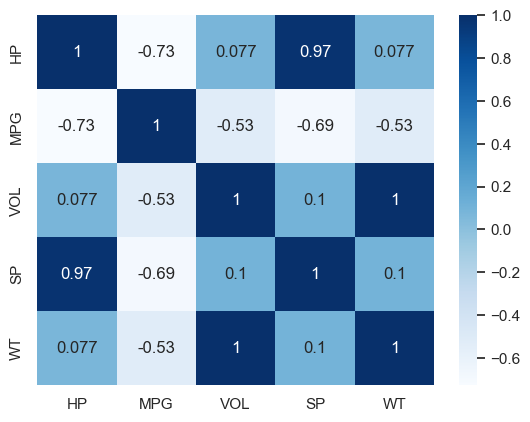

In [66]:
from seaborn import heatmap
sns.heatmap(cars.corr(),cmap='Blues',annot=True)

<Axes: xlabel='HP', ylabel='VOL'>

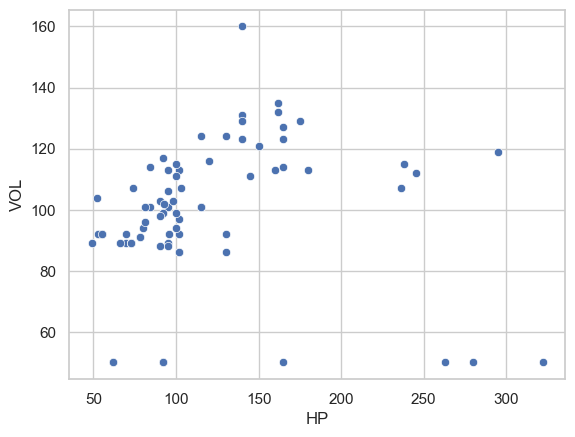

In [67]:
sns.scatterplot(x=cars['HP'],y=cars['VOL'])

<Axes: xlabel='HP', ylabel='SP'>

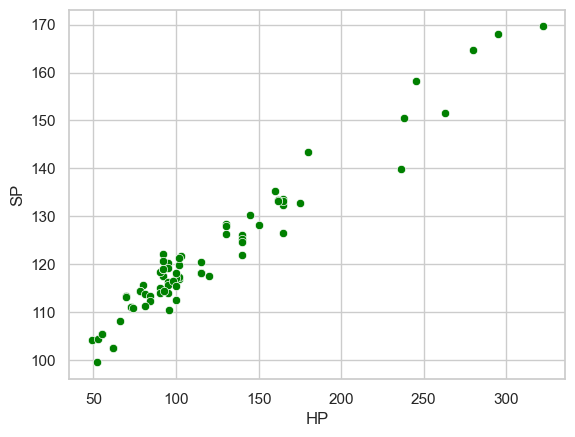

In [68]:
scatterplot(x=cars['HP'],y=cars['SP'],color='green')

<Axes: xlabel='HP', ylabel='WT'>

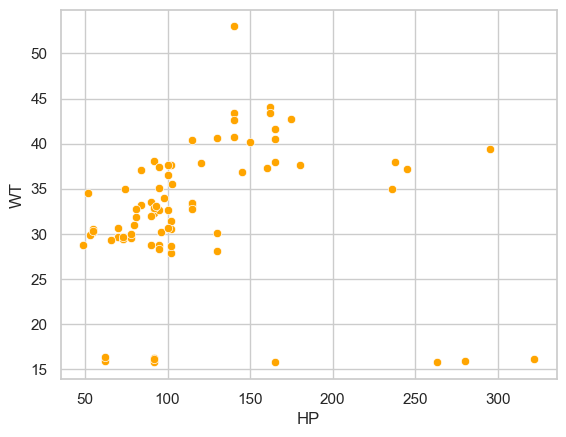

In [69]:
scatterplot(x=cars['HP'],y=cars['WT'],color='orange')

<Axes: xlabel='VOL', ylabel='SP'>

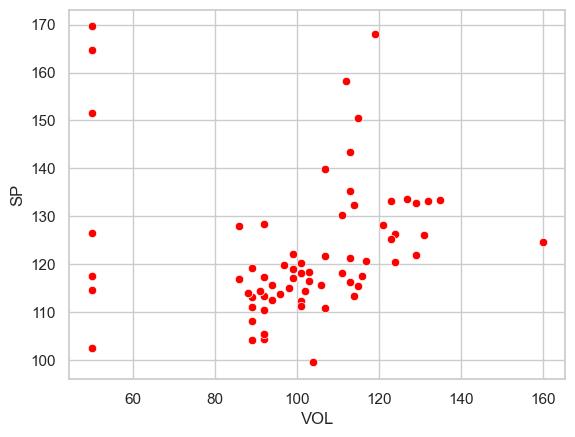

In [70]:
scatterplot(x=cars['VOL'],y=cars['SP'],color='red')

<Axes: xlabel='VOL', ylabel='WT'>

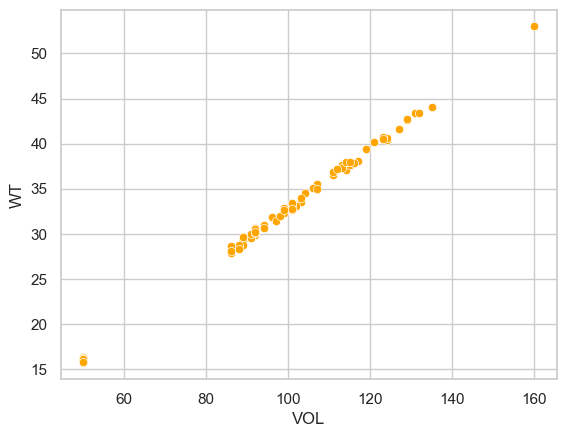

In [71]:
scatterplot(x=cars['VOL'],y=cars['WT'],color='orange')

<Axes: xlabel='SP', ylabel='WT'>

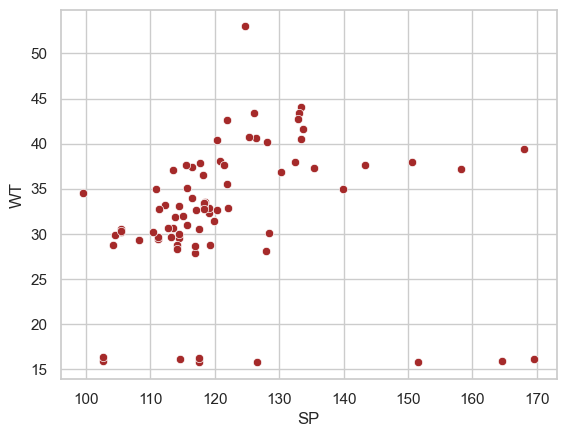

In [72]:
scatterplot(x=cars['SP'],y=cars['WT'],color='brown')

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cars[['HP','WT','VOL','SP']]=sc.fit_transform(cars[['HP','WT','VOL','SP']])

In [101]:
np.round(cars.describe(),2)

,HP,MPG,VOL,SP,WT
count,81.00,81.00,81.00,81.00,81.00
mean,-0.00,34.42,0.00,0.00,0.00
std,1.01,9.13,1.01,1.01,1.01
min,-1.21,12.10,-2.20,-1.56,-2.24
25%,-0.59,27.86,-0.44,-0.55,-0.38
50%,-0.31,35.15,0.10,-0.24,0.04
75%,0.40,39.53,0.64,0.35,0.67
max,3.60,53.70,2.76,3.41,2.76


**Simple Linear Regression Models**

In [103]:
ml_v=smf.ols('MPG~VOL',data=cars).fit()
ml_v.rsquared

0.2799008651122705

In [111]:
ml_v.params

Intercept    34.422076
VOL          -4.801137
dtype: float64

In [105]:
ml_w=smf.ols('MPG~WT',data=cars).fit()
ml_w.rsquared

0.2774751389270127

In [113]:
ml_wv=smf.ols('MPG~WT+VOL',data=cars).fit()
ml_wv.rsquared

0.282109561644598

In [115]:
ml_sp=smf.ols('MPG~SP',data=cars).fit()
ml_sp.rsquared

0.4721402334141217

In [117]:
ml_hp=smf.ols('MPG~HP',data=cars).fit()
ml_hp.rsquared

0.5256806086282022

In [133]:
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
model.rsquared

0.7705372737359844

In [149]:
#Coefficients
model.params

Intercept    34.422076
WT            2.982842
VOL          -7.448031
SP            5.575816
HP          -11.660955
dtype: float64

In [ ]:
MPG = 0.359*WT -0.888*VOL + 0.66*SP -1.348*HP + 0.898